In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from chemevo import Iron as Fe

In [2]:
params = {
   'axes.labelsize': 15,
   'font.size': 15,
   'legend.fontsize': 10,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': True, #to use TeX in your labels
   'font.family':'serif',
   'axes.titlesize': 15
   }
rcParams.update(params)

In [3]:
eta = 2.5
m_Fe_cc = 0.0012
m_Fe_Ia = 0.0017
r = 0.4
tau_star = 1 #Gyr
tau_dep = 0.323 #Gyr
tau_sfh = 6 #Gyr
tau_Ia = 1.5 #Gyr
tau_dep_Ia = 0.412 #Gyr
tau_Ia_sfh = 2 #Gyr
tau_dep_sfh = 0.341 #Gyr
t_D = 0.15 #Gyr

# 1) Constant SFR

In [4]:
t_array = np.linspace(0,8,100)
M_g_array_const = np.ones(len(t_array))
eq_Z_Fe_const = Fe.Z_Fe_eq_const(m_Fe_cc, m_Fe_Ia, eta, r)
Z_Fe_Ia, Z_Fe_cc, analytical_Z_Fe_const = Fe.Z_Fe_const_sfr(t_array, m_Fe_Ia, m_Fe_cc, eta, r, tau_dep, t_D, tau_Ia)

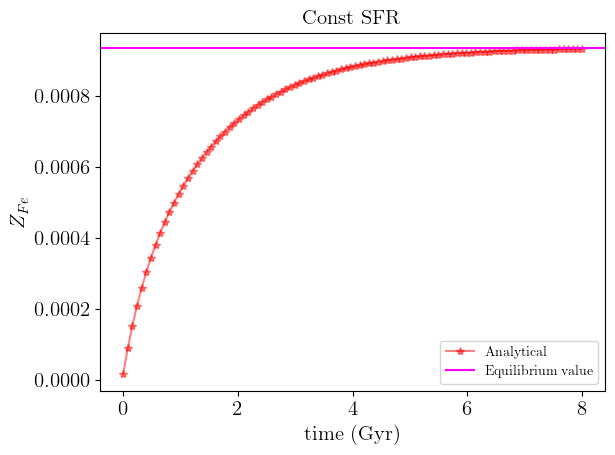

In [13]:
plt.plot(t_array, analytical_Z_Fe_const, color = 'red', marker='*', label = 'Analytical', alpha = 0.5)
plt.axhline(eq_Z_Fe_const , color = 'magenta', label = 'Equilibrium value')

plt.title("Const SFR")
plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{Fe}$')
plt.tight_layout()
plt.show()

# Exponential SFR

$M_{g}(t) = M_{g,0}e^{t/\tau_{sfh}}$


In [6]:
t_array = np.linspace(0,8,100)
M_g_0 = 1
M_g_array_exp = M_g_0 * np.exp(-t_array/tau_sfh)

Z_Fe_cc, Z_Fe_Ia, analytical_Z_Fe_exp = Fe.Z_Fe_exp_sfr(t_array, m_Fe_Ia, m_Fe_cc, t_D, tau_star, tau_dep, tau_sfh, tau_Ia)
Z_Fe_cc_eq, Z_Fe_Ia_eq, analytical_Z_Fe_exp_eq = Fe.Z_Fe_eq_exp(m_Fe_Ia, m_Fe_cc, t_D, tau_star, tau_dep, tau_sfh, tau_Ia)

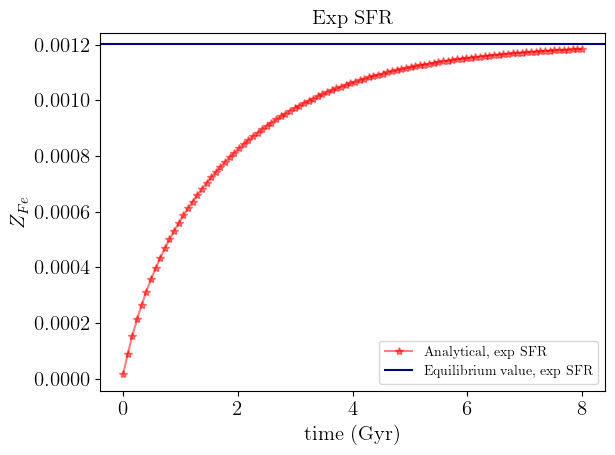

In [14]:
plt.plot(t_array, analytical_Z_Fe_exp, color = 'red', marker='*', label = 'Analytical, exp SFR', alpha = 0.5)
plt.axhline(analytical_Z_Fe_exp_eq, color = 'navy', label = 'Equilibrium value, exp SFR')


plt.legend()
plt.xlabel('time (Gyr)')
plt.ylabel(r'$Z_{Fe}$')
plt.title("Exp SFR")
plt.tight_layout()
plt.show()